<a href="https://colab.research.google.com/github/skarshad1928/Weather-Analysis/blob/main/Weather-data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import geocoder

g = geocoder.ip('me')

latitude = g.latlng[0]
longitude = g.latlng[1]

print("Latitude:", latitude)
print("Longitude:", longitude)


Latitude: 32.8546
Longitude: -79.9748


In [32]:
import requests
import pandas as pd

url = "https://archive-api.open-meteo.com/v1/archive"

latitude = 32.8546
longitude = -79.9748

years = [2022, 2023, 2024, 2025]

all_data = []

for year in years:
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": f"{year}-01-01",
        "end_date": f"{year}-01-31",
        "hourly": "temperature_2m,relative_humidity_2m",
        "timezone": "auto"
    }

    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame({
        "time": data["hourly"]["time"],
        "temperature": data["hourly"]["temperature_2m"],
        "humidity": data["hourly"]["relative_humidity_2m"]
    })

    df["time"] = pd.to_datetime(df["time"])

    df = df[df["time"].dt.hour == 12]

    df["year"] = year

    all_data.append(df)

final_df = pd.concat(all_data, ignore_index=True)


final_df["date"] = final_df["time"].dt.date
final_df = final_df.drop(columns=["time"])

final_df.head()


,temperature,humidity,year,date
0,23.4,79,2022,2022-01-01
1,24.0,76,2022,2022-01-02
2,11.9,60,2022,2022-01-03
3,9.2,62,2022,2022-01-04
4,12.4,93,2022,2022-01-05


In [33]:
final_df.tail() #31*4= 124

,temperature,humidity,year,date
119,7.8,96,2025,2025-01-27
120,11.5,59,2025,2025-01-28
121,16.8,46,2025,2025-01-29
122,16.4,44,2025,2025-01-30
123,20.2,75,2025,2025-01-31


In [34]:
from plotnine import (
    ggplot, aes, geom_line, geom_point,
    labs, theme_minimal
)
import pandas as pd


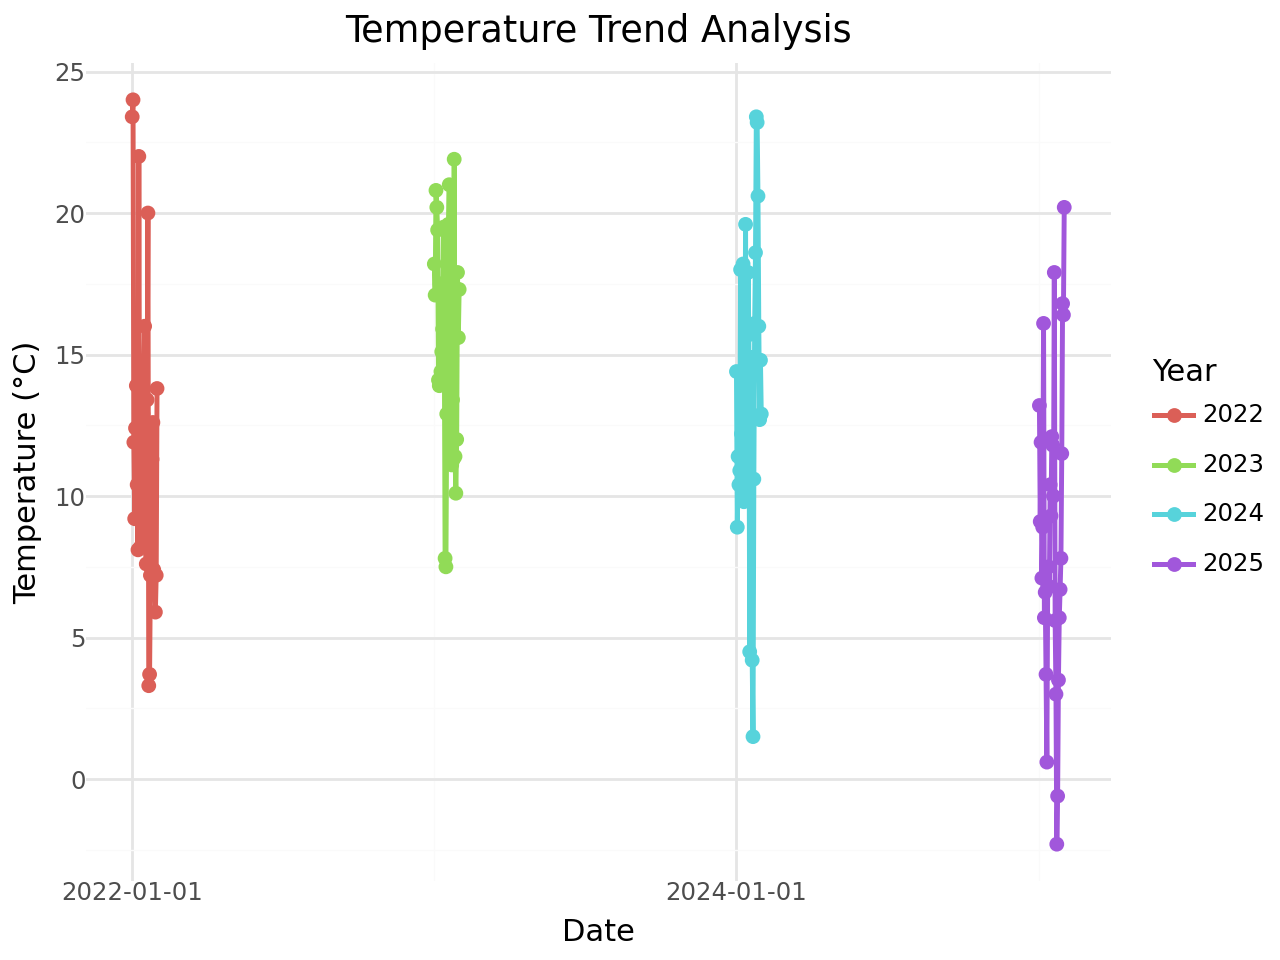

In [35]:
# ensure date is datetime
final_df['date'] = pd.to_datetime(final_df['date'])

(
    ggplot(final_df, aes(x='date', y='temperature', color='factor(year)'))
    + geom_line(size=1)
    + geom_point(size=2)
    + labs(
        title='Temperature Trend Analysis',
        x='Date',
        y='Temperature (°C)',
        color='Year'
    )
    + theme_minimal()
)


The visualization shows that the temperature has been decreasing each year. Based on this trend, we can expect that the temperature on the first day of **2026** may fall below **20 °C**.

***Over the past two years***, this location has experienced significantly lower temperatures compared to **2025**, with some values dropping below 0 °C. This indicates a notable cooling trend in recent years.

The decline in temperature may be influenced by factors such as changing climatic conditions, seasonal variability, or regional weather patterns affecting this location.


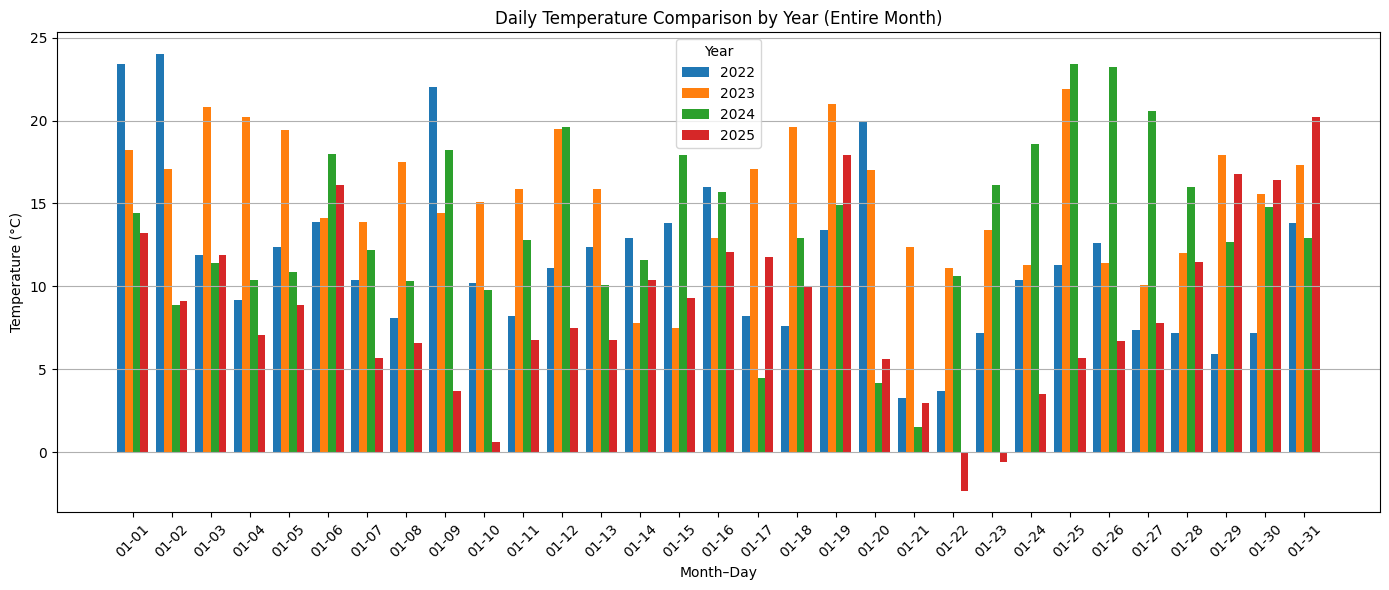

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

final_df['date'] = pd.to_datetime(final_df['date'])


final_df['month_day'] = final_df['date'].dt.strftime('%m-%d')

df_month = final_df[final_df['date'].dt.month == 1]


df_2022 = df_month[df_month['year'] == 2022]
df_2023 = df_month[df_month['year'] == 2023]
df_2024 = df_month[df_month['year'] == 2024]
df_2025 = df_month[df_month['year'] == 2025]

df_2022 = df_2022.sort_values('month_day')
df_2023 = df_2023.sort_values('month_day')
df_2024 = df_2024.sort_values('month_day')
df_2025 = df_2025.sort_values('month_day')


days = df_2022['month_day']
x = np.arange(len(days))
width = 0.2


plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*width, df_2022['temperature'], width, label='2022')
plt.bar(x - 0.5*width, df_2023['temperature'], width, label='2023')
plt.bar(x + 0.5*width, df_2024['temperature'], width, label='2024')
plt.bar(x + 1.5*width, df_2025['temperature'], width, label='2025')

plt.xticks(x, days, rotation=45)
plt.title('Daily Temperature Comparison by Year (Entire Month)')
plt.xlabel('Month–Day')
plt.ylabel('Temperature (°C)')
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


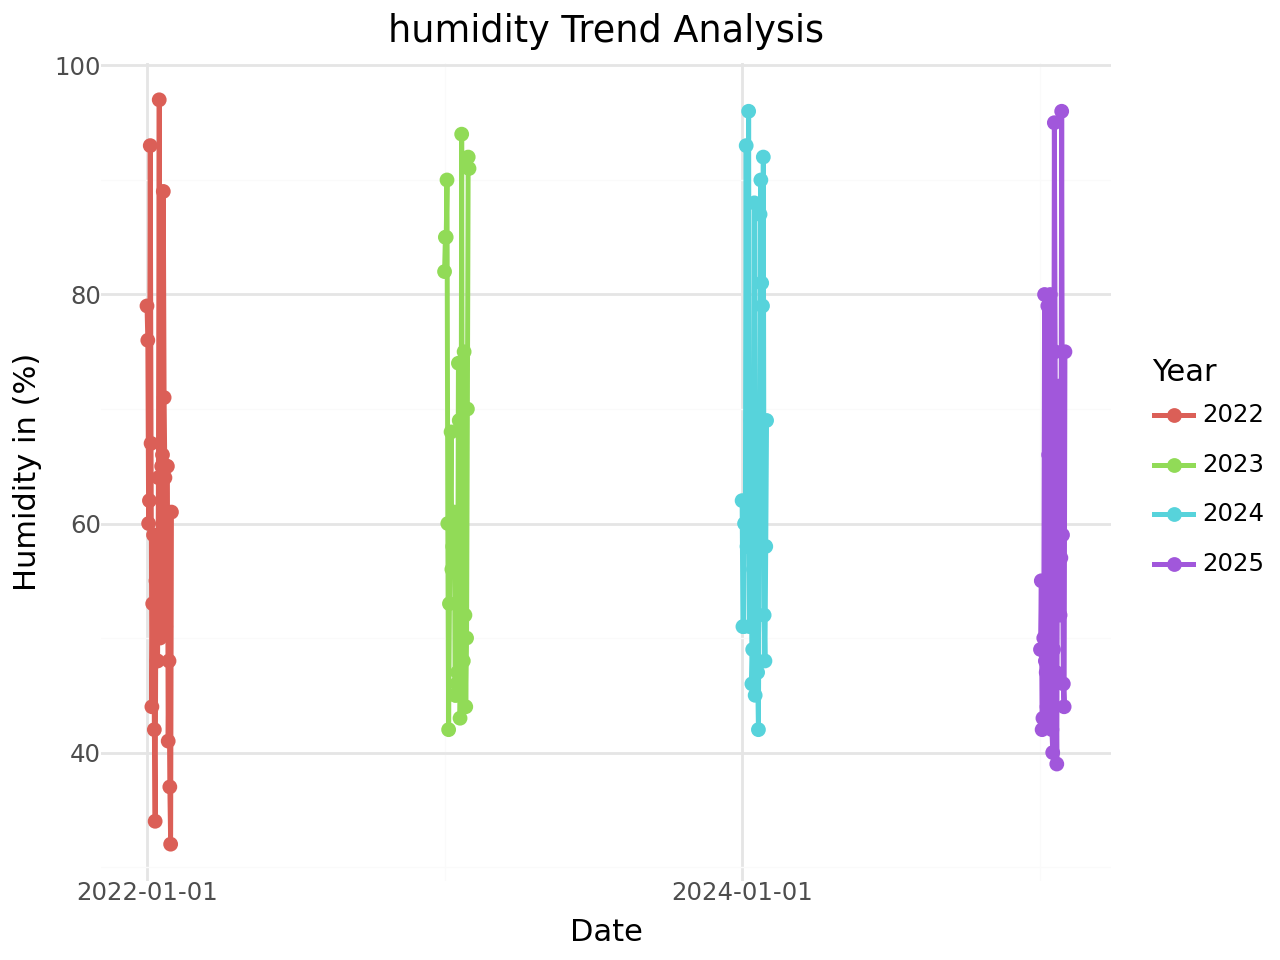

In [47]:
# ensure date is datetime
final_df['date'] = pd.to_datetime(final_df['date'])

(
    ggplot(final_df, aes(x='date', y='humidity', color='factor(year)'))
    + geom_line(size=1)
    + geom_point(size=2)
    + labs(
        title='humidity Trend Analysis',
        x='Date',
        y='Humidity in (%)',
        color='Year'
    )
    + theme_minimal()
)


The *** humidity*** levels show **no significant differences** across the years. Although the range of humidity values gradually decreases over time, it never reaches extremely high levels.

**In January, humidity tends to be lower compared to other months across all four years.** A notable observation is that as humidity decreases, temperature also shows a corresponding change, **indicating a correlation between humidity and temperature consistently across these four years**.

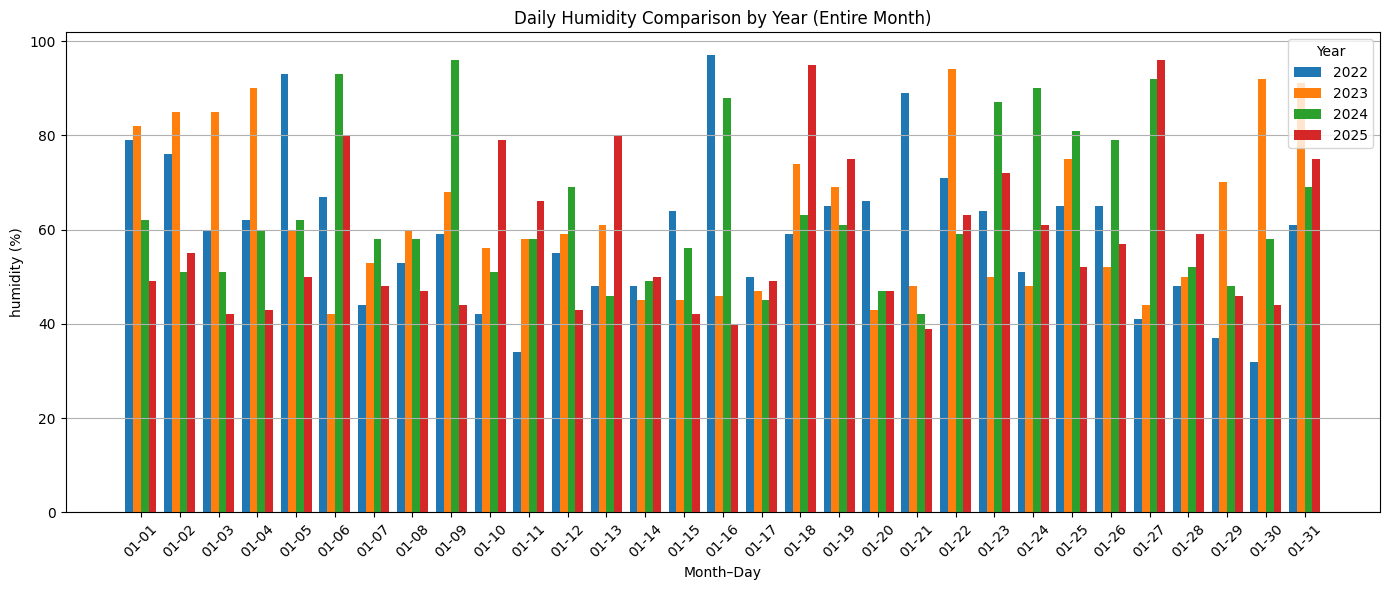

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

final_df['date'] = pd.to_datetime(final_df['date'])


final_df['month_day'] = final_df['date'].dt.strftime('%m-%d')

df_month = final_df[final_df['date'].dt.month == 1]


df_2022 = df_month[df_month['year'] == 2022]
df_2023 = df_month[df_month['year'] == 2023]
df_2024 = df_month[df_month['year'] == 2024]
df_2025 = df_month[df_month['year'] == 2025]

df_2022 = df_2022.sort_values('month_day')
df_2023 = df_2023.sort_values('month_day')
df_2024 = df_2024.sort_values('month_day')
df_2025 = df_2025.sort_values('month_day')


days = df_2022['month_day']
x = np.arange(len(days))
width = 0.2


plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*width, df_2022['humidity'], width, label='2022')
plt.bar(x - 0.5*width, df_2023['humidity'], width, label='2023')
plt.bar(x + 0.5*width, df_2024['humidity'], width, label='2024')
plt.bar(x + 1.5*width, df_2025['humidity'], width, label='2025')

plt.xticks(x, days, rotation=45)
plt.title('Daily Humidity Comparison by Year (Entire Month)')
plt.xlabel('Month–Day')
plt.ylabel('humidity (%)')
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [50]:
final_df['temperature'].corr(final_df['humidity'])

np.float64(0.4092625810755026)

In [51]:
import numpy as np

# X = humidity, Y = temperature
X = final_df['humidity']
Y = final_df['temperature']

# calculate slope (m) and intercept (c)
m, c = np.polyfit(X, Y, 1)

print(f"Linear Equation: Temperature = {m:.3f} * Humidity + {c:.3f}")


Linear Equation: Temperature = 0.137 * Humidity + 3.968


In [55]:
min_humidity = final_df['humidity'].min()
max_humidity = final_df['humidity'].max()

print(f"Minimum Humidity: {min_humidity}")
print(f"Maximum Humidity: {max_humidity}")

Minimum Humidity: 32
Maximum Humidity: 97


Temperature =32*0.137+3.968=8.352

In [56]:
filter=final_df[final_df['humidity'] == 32]

In [59]:
filter[filter['temperature']<=8.32]

,temperature,humidity,year,date,month_day
29,7.2,32,2022,2022-01-30,01-30


In [60]:
filter[filter['temperature']>=8.32]

,temperature,humidity,year,date,month_day


Temperature =97*0.137+3.968=17.26

In [62]:
filter=final_df[final_df['humidity'] == 97]

In [63]:
filter.head()

,temperature,humidity,year,date,month_day
15,16.0,97,2022,2022-01-16,01-16


In [64]:
min_humidity = final_df['temperature'].min()
max_humidity = final_df['temperature'].max()

print(f"Minimum Temperature: {min_humidity}")
print(f"Maximum Temperature: {max_humidity}")

Minimum Temperature: -2.3
Maximum Temperature: 24.0


In [65]:
T=24.0
(T-3.968)/0.137

146.21897810218977

In [67]:
final_df[final_df['temperature']==24]

,temperature,humidity,year,date,month_day
1,24.0,76,2022,2022-01-02,01-02


Polynomial Equation:
           2
-0.002914 x + 0.5226 x - 7.931


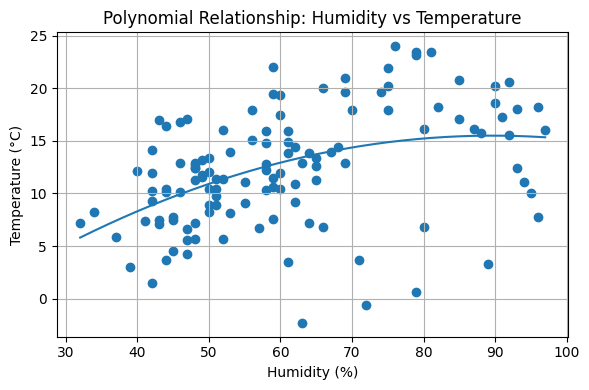

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# X = humidity, Y = temperature
X = final_df['humidity'].values
Y = final_df['temperature'].values

# Polynomial degree (2 = quadratic)
degree = 2

# Fit polynomial
coeffs = np.polyfit(X, Y, degree)
poly_eq = np.poly1d(coeffs)

# Print equation
print("Polynomial Equation:")
print(poly_eq)

# Generate smooth curve
X_sorted = np.linspace(X.min(), X.max(), 200)
Y_pred = poly_eq(X_sorted)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X, Y)
plt.plot(X_sorted, Y_pred)

plt.title('Polynomial Relationship: Humidity vs Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
import requests
import pandas as pd


url = "https://archive-api.open-meteo.com/v1/archive"


latitude = 32.8546
longitude = -79.9748


date = "2022-01-02"


params = {
    "latitude": latitude,
    "longitude": longitude,
    "start_date": date,
    "end_date": date,
    "hourly": "temperature_2m,relative_humidity_2m",
    "timezone": "auto"
}

# API request
response = requests.get(url, params=params)
data = response.json()

# Create DataFrame with hourly data (24 hours)
df = pd.DataFrame({
    "time": data["hourly"]["time"],
    "temperature": data["hourly"]["temperature_2m"],
    "humidity": data["hourly"]["relative_humidity_2m"]
})

# Convert time column to datetime
df["time"] = pd.to_datetime(df["time"])

# -----------------------------------
# MAXIMUM HUMIDITY (hourly data)
# -----------------------------------

max_humidity = df["humidity"].max()

# Row where max humidity occurred
max_humidity_row = df.loc[df["humidity"].idxmax()]

print(f"Maximum hourly humidity on {date}: {max_humidity}%")
print("Occurred at:")
print(max_humidity_row)

# Optional: display first few rows
df.head()


Maximum hourly humidity on 2022-01-02: 95%
Occurred at:
time           2022-01-02 20:00:00
temperature                   19.6
humidity                        95
Name: 20, dtype: object


,time,temperature,humidity
0,2022-01-02 00:00:00,20.1,82
1,2022-01-02 01:00:00,19.9,82
2,2022-01-02 02:00:00,20.1,79
3,2022-01-02 03:00:00,20.0,78
4,2022-01-02 04:00:00,19.5,80


In [73]:
import requests
import pandas as pd

url = "https://archive-api.open-meteo.com/v1/archive"

latitude = 32.8546
longitude = -79.9748

years = [2022, 2023, 2024, 2025]

all_data = []

for year in years:
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": f"{year}-01-01",
        "end_date": f"{year}-01-31",
        "hourly": "precipitation",
        "timezone": "auto"
    }

    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame({
        "time": data["hourly"]["time"],
        "precipitation": data["hourly"]["precipitation"]
    })
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["time"].dt.hour == 12]
    df["year"] = year
    df["date"] = df["time"].dt.date

    all_data.append(df)


final_precip_df = pd.concat(all_data, ignore_index=True)

final_precip_df.head()


,time,precipitation,year,date
0,2022-01-01 12:00:00,0.0,2022,2022-01-01
1,2022-01-02 12:00:00,0.0,2022,2022-01-02
2,2022-01-03 12:00:00,0.0,2022,2022-01-03
3,2022-01-04 12:00:00,0.0,2022,2022-01-04
4,2022-01-05 12:00:00,0.0,2022,2022-01-05


In [75]:

final_precip_df["month_day"] = final_precip_df["date"].astype(str).str[5:]
final_precip_df = final_precip_df[
    ["precipitation", "year", "date", "month_day"]
]

final_precip_df.head()


,precipitation,year,date,month_day
0,0.0,2022,2022-01-01,01-01
1,0.0,2022,2022-01-02,01-02
2,0.0,2022,2022-01-03,01-03
3,0.0,2022,2022-01-04,01-04
4,0.0,2022,2022-01-05,01-05


In [74]:
final_df.head()

,temperature,humidity,year,date,month_day
0,23.4,79,2022,2022-01-01,01-01
1,24.0,76,2022,2022-01-02,01-02
2,11.9,60,2022,2022-01-03,01-03
3,9.2,62,2022,2022-01-04,01-04
4,12.4,93,2022,2022-01-05,01-05


In [77]:
final_precip_df.tail()

,precipitation,year,date,month_day
119,0.3,2025,2025-01-27,01-27
120,0.0,2025,2025-01-28,01-28
121,0.0,2025,2025-01-29,01-29
122,0.0,2025,2025-01-30,01-30
123,0.0,2025,2025-01-31,01-31


In [78]:
final_precip_df['date'] = pd.to_datetime(final_precip_df['date'])

final_df = final_df.merge(
    final_precip_df,
    on=["year", "date", "month_day"],
    how="left"
)

In [79]:
final_df.tail()

,temperature,humidity,year,date,month_day,precipitation
119,7.8,96,2025,2025-01-27,01-27,0.3
120,11.5,59,2025,2025-01-28,01-28,0.0
121,16.8,46,2025,2025-01-29,01-29,0.0
122,16.4,44,2025,2025-01-30,01-30,0.0
123,20.2,75,2025,2025-01-31,01-31,0.0


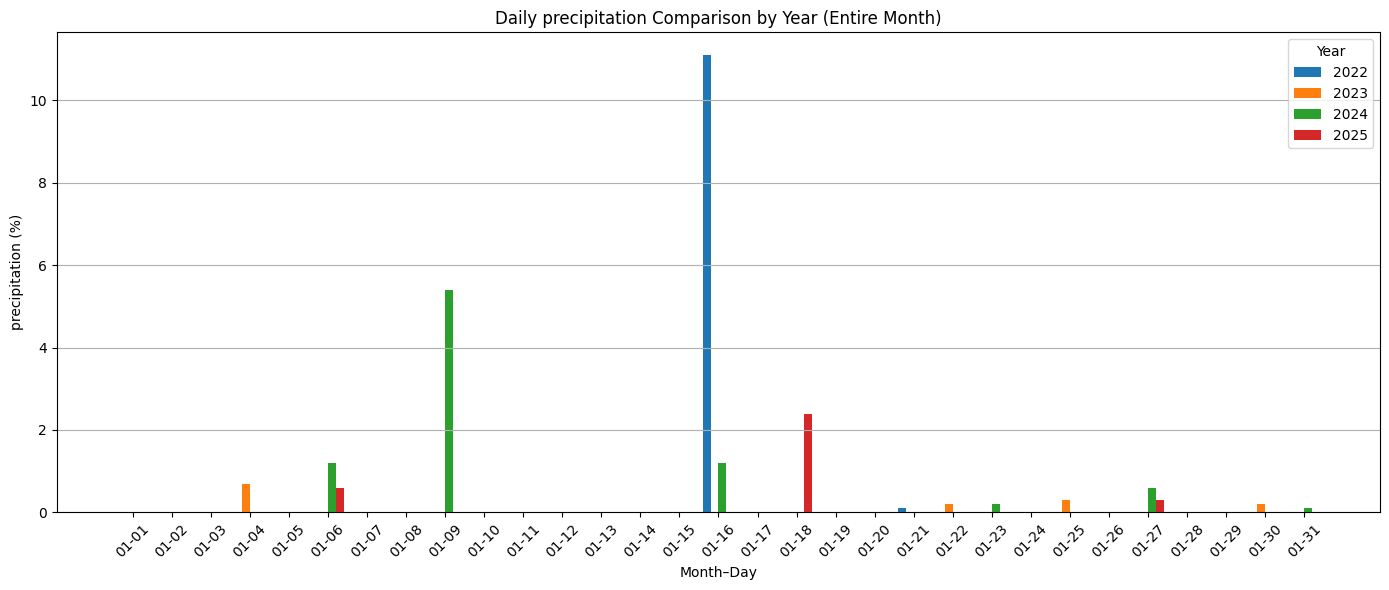

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

final_df['date'] = pd.to_datetime(final_df['date'])


final_df['month_day'] = final_df['date'].dt.strftime('%m-%d')

df_month = final_df[final_df['date'].dt.month == 1]


df_2022 = df_month[df_month['year'] == 2022]
df_2023 = df_month[df_month['year'] == 2023]
df_2024 = df_month[df_month['year'] == 2024]
df_2025 = df_month[df_month['year'] == 2025]

df_2022 = df_2022.sort_values('month_day')
df_2023 = df_2023.sort_values('month_day')
df_2024 = df_2024.sort_values('month_day')
df_2025 = df_2025.sort_values('month_day')


days = df_2022['month_day']
x = np.arange(len(days))
width = 0.2


plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*width, df_2022['precipitation'], width, label='2022')
plt.bar(x - 0.5*width, df_2023['precipitation'], width, label='2023')
plt.bar(x + 0.5*width, df_2024['precipitation'], width, label='2024')
plt.bar(x + 1.5*width, df_2025['precipitation'], width, label='2025')

plt.xticks(x, days, rotation=45)
plt.title('Daily precipitation Comparison by Year (Entire Month)')
plt.xlabel('Month–Day')
plt.ylabel('precipitation (mm)')
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

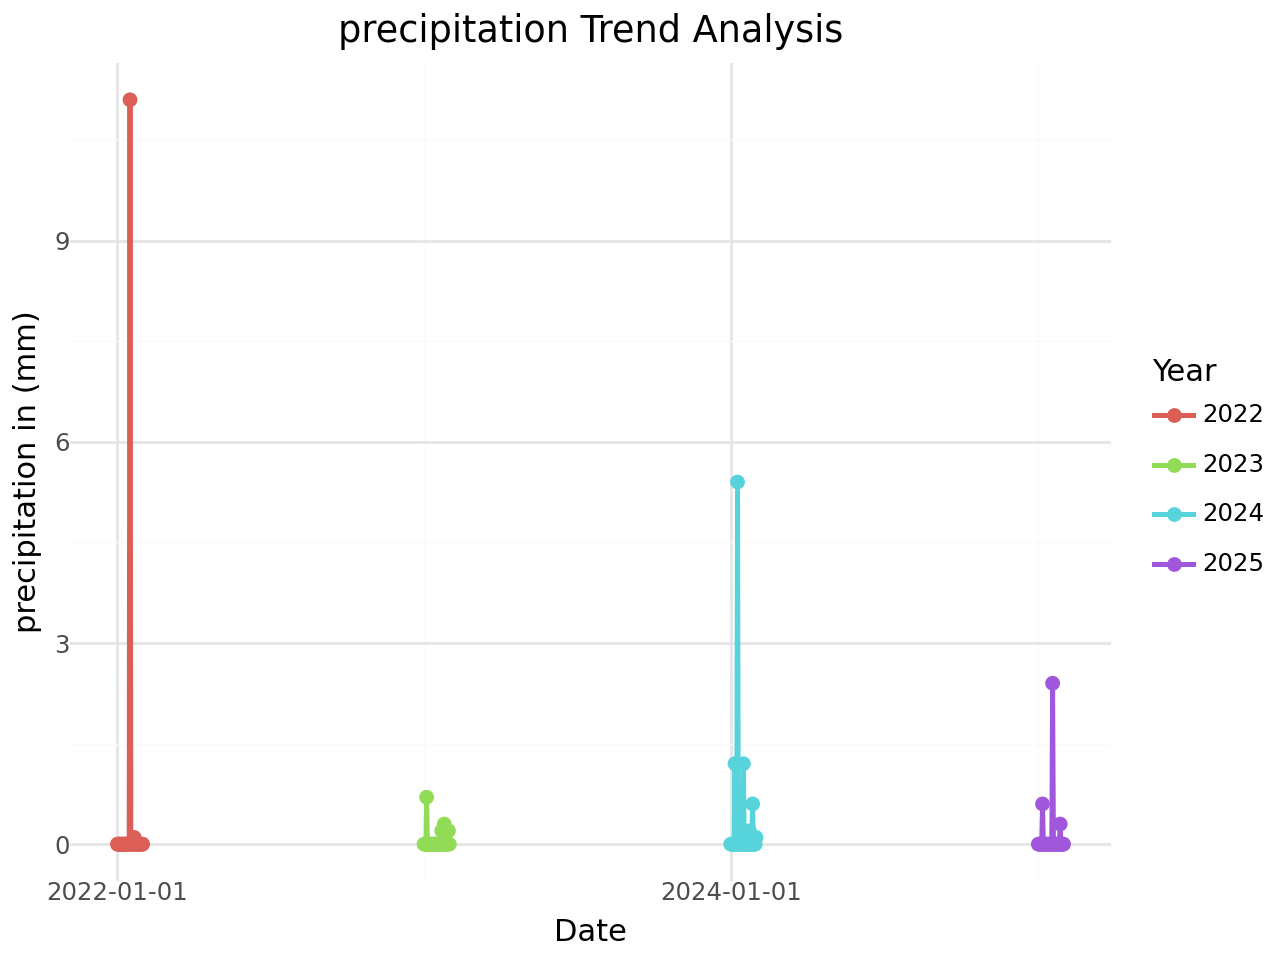

In [81]:
# ensure date is datetime
final_df['date'] = pd.to_datetime(final_df['date'])

(
    ggplot(final_df, aes(x='date', y='precipitation', color='factor(year)'))
    + geom_line(size=1)
    + geom_point(size=2)
    + labs(
        title='precipitation Trend Analysis',
        x='Date',
        y='precipitation in (mm)',
        color='Year'
    )
    + theme_minimal()
)

In [84]:
final_df['precipitation'].corr(final_df['humidity'])

np.float64(0.36388168269258925)

Polynomial Equation:
          2
0.001481 x - 0.1708 x + 4.714


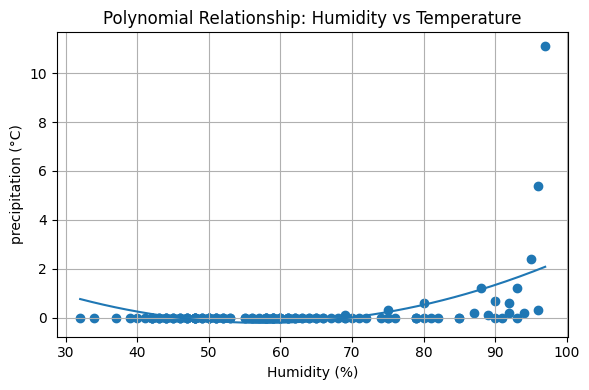

In [86]:
import numpy as np
import matplotlib.pyplot as plt

X = final_df['humidity'].values
Y = final_df['precipitation'].values


degree = 2


coeffs = np.polyfit(X, Y, degree)
poly_eq = np.poly1d(coeffs)


print("Polynomial Equation:")
print(poly_eq)

# Generate smooth curve
X_sorted = np.linspace(X.min(), X.max(), 200)
Y_pred = poly_eq(X_sorted)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X, Y)
plt.plot(X_sorted, Y_pred)

plt.title('Polynomial Relationship: Humidity vs Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('precipitation (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [87]:
# t h p are positively correlated

In [88]:
all_wind = []

for year in years:
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": f"{year}-01-01",
        "end_date": f"{year}-01-31",
        "hourly": "winddirection_10m",
        "timezone": "auto"
    }

    response = requests.get(url, params=params)
    data = response.json()

    df_wind = pd.DataFrame({
        "time": data["hourly"]["time"],
        "wind_direction": data["hourly"]["winddirection_10m"]
    })

    df_wind["time"] = pd.to_datetime(df_wind["time"])

    # Keep only 12:00 PM
    df_wind = df_wind[df_wind["time"].dt.hour == 12]

    df_wind["year"] = year
    df_wind["date"] = df_wind["time"].dt.date

    all_wind.append(df_wind)

wind_df = pd.concat(all_wind, ignore_index=True)


In [90]:
wind_df.head()

,time,wind_direction,year,date
0,2022-01-01 12:00:00,209,2022,2022-01-01
1,2022-01-02 12:00:00,213,2022,2022-01-02
2,2022-01-03 12:00:00,326,2022,2022-01-03
3,2022-01-04 12:00:00,25,2022,2022-01-04
4,2022-01-05 12:00:00,326,2022,2022-01-05


In [92]:
final_df["date"] = pd.to_datetime(final_df["date"]).dt.date
wind_df["date"] = pd.to_datetime(wind_df["date"]).dt.date


In [93]:
final_df = final_df.merge(
    wind_df[["year", "date", "wind_direction"]],
    on=["year", "date"],
    how="left"
)


In [94]:
final_df.head()

,temperature,humidity,year,date,month_day,precipitation,wind_direction
0,23.4,79,2022,2022-01-01,01-01,0.0,209
1,24.0,76,2022,2022-01-02,01-02,0.0,213
2,11.9,60,2022,2022-01-03,01-03,0.0,326
3,9.2,62,2022,2022-01-04,01-04,0.0,25
4,12.4,93,2022,2022-01-05,01-05,0.0,326


In [95]:
def degree_to_compass(deg):
    if pd.isna(deg):
        return None
    directions = ["N", "NE", "E", "SE", "S", "SW", "W", "NW"]
    idx = int((deg + 22.5) // 45) % 8
    return directions[idx]


In [96]:
final_df["wind_direction"] = final_df["wind_direction"].apply(degree_to_compass)


In [98]:
final_df.head()

,temperature,humidity,year,date,month_day,precipitation,wind_direction
0,23.4,79,2022,2022-01-01,01-01,0.0,SW
1,24.0,76,2022,2022-01-02,01-02,0.0,SW
2,11.9,60,2022,2022-01-03,01-03,0.0,NW
3,9.2,62,2022,2022-01-04,01-04,0.0,NE
4,12.4,93,2022,2022-01-05,01-05,0.0,NW


In [106]:
precipiration_df_direction=final_df[final_df["precipitation"] > 0]

In [107]:
direction_counts = precipiration_df_direction["wind_direction"].value_counts()


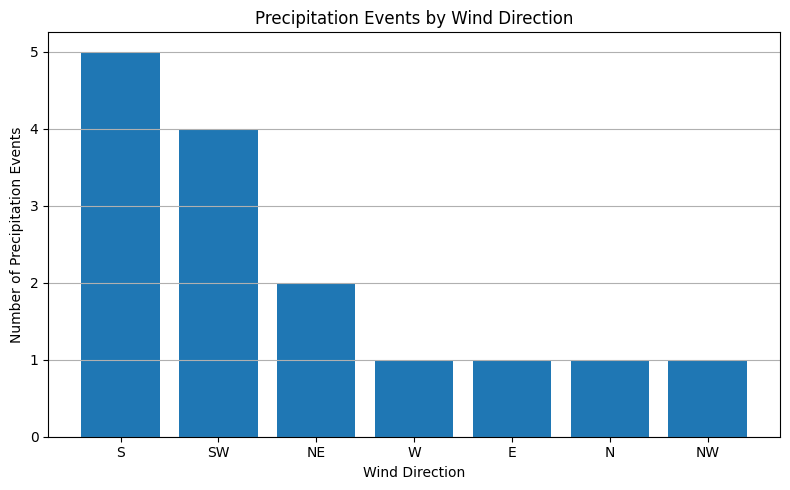

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(direction_counts.index, direction_counts.values)
plt.xlabel("Wind Direction")
plt.ylabel("Number of Precipitation Events")
plt.title("Precipitation Events by Wind Direction")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [109]:
precipiration_df_direction[precipiration_df_direction["wind_direction"] == "S"]

,temperature,humidity,year,date,month_day,precipitation,wind_direction
15,16.0,97,2022,2022-01-16,01-16,11.1,S
55,21.9,75,2023,2023-01-25,01-25,0.3,S
70,18.2,96,2024,2024-01-09,01-09,5.4,S
88,20.6,92,2024,2024-01-27,01-27,0.6,S
119,7.8,96,2025,2025-01-27,01-27,0.3,S


An interesting observation is that rainfall mostly occurs when humidity exceeds **75%** and temperature is above** 16 °C**. During the period from ***January 16 to January 27***, most of the recorded rainfall events are associated with southerly winds. The average precipitation during these events is ***approximately 3.6 mm***, indicating that south winds play a significant role in rainfall occurrence during this period.

In [112]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.5 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip


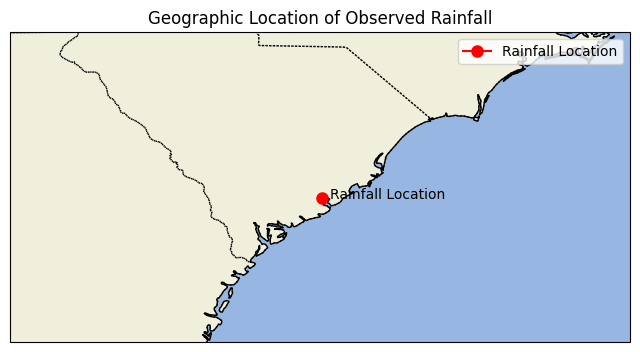

In [113]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Location
latitude = 32.8546
longitude = -79.9748

# Create map with projection
plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set map extent (zoom near location)
ax.set_extent([-84, -76, 31, 35], crs=ccrs.PlateCarree())

# Add geographic features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# Plot rainfall location
ax.plot(longitude, latitude, marker='o', color='red', markersize=8,
        transform=ccrs.PlateCarree(), label="Rainfall Location")

ax.text(longitude + 0.1, latitude, "Rainfall Location",
        transform=ccrs.PlateCarree())

# Title & legend
plt.title("Geographic Location of Observed Rainfall")
plt.legend()
plt.show()


Heavy rainfall is most frequently associated with southerly winds, as moist air is transported from the nearby ocean located to the south of the study region. This oceanic airflow significantly increases humidity and promotes cloud formation, leading to higher precipitation.

The second major contributor to rainfall is south-westerly winds, which also carry moisture from the ocean and enhance rainfall intensity. The third major wind direction associated with rainfall is north-easterly, which can bring moist air masses under specific atmospheric conditions.

These wind patterns suggest that rainfall in this region is strongly influenced by proximity to oceanic sources of moisture. Large-scale atmospheric circulation and moisture transport from nearby water bodies play a key role in precipitation events.

In a broader climatic context, regions such as India experience substantial rainfall during this month due to moisture transported from the western ocean and the Bay of Bengal, particularly during cyclonic activity. Similar mechanisms of ocean-driven moisture transport and cyclonic systems influence rainfall patterns in the study region.

https://zoom.earth/maps/satellite/#view=28,84.6,4.44z

This is the link to view the satellite cloud structure directions.

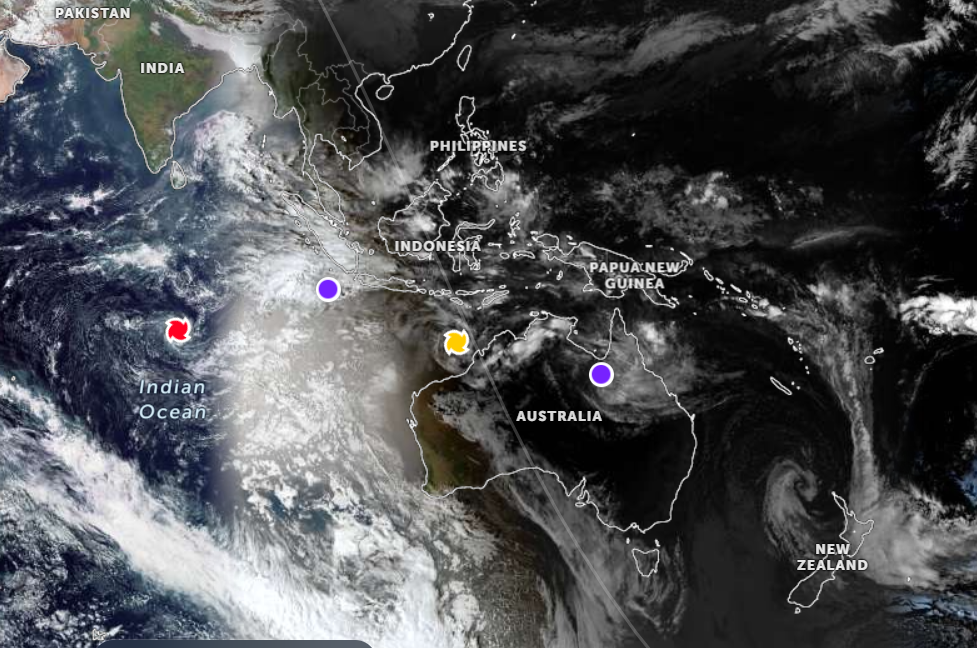

Overall, the outcome of the project clearly shows that climate is influenced by surrounding conditions. Changes in climate are closely related to neighboring cities or locations. When a point or city is surrounded by other places, there is no doubt that the climatic conditions of those surrounding areas influence the climate at the center of the city.